# UNSUPERVISED CLUSTERING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import warnings
import sys

In [2]:
warnings.filterwarnings('ignore')

In [3]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# DATA CLEANING

 # We have some (object) types in our data, so we need to encode them, but first we need to deal with missing values

In [6]:
df = df.dropna()
print('Number of data-points:', len(df))

Number of data-points: 2216


# Now I gonna use column (Dt_Customer), to get the newest and oldest recorded dates

In [7]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


# Now we are gonna create new column (Customer_For), It will contain (number of days the customers started to shop - to the last recorded date)


In [8]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

# Then we are gonna look at categorical features and their unique values

In [9]:
print(df["Marital_Status"].value_counts())

print(df["Education"].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


# Now I gonna do some features engineering

In [10]:
df["Age"] = 2021-df["Year_Birth"]


df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]


df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


df["Children"]=df["Kidhome"]+df["Teenhome"]


df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


# It seems that I have some wrong values in Income column and Age column, I gonna plot my data to see what happened

In [12]:
import seaborn as sn
from matplotlib import colors

# I can see in age column some outliers, this datapoints affect on our age value, as well as in income column

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

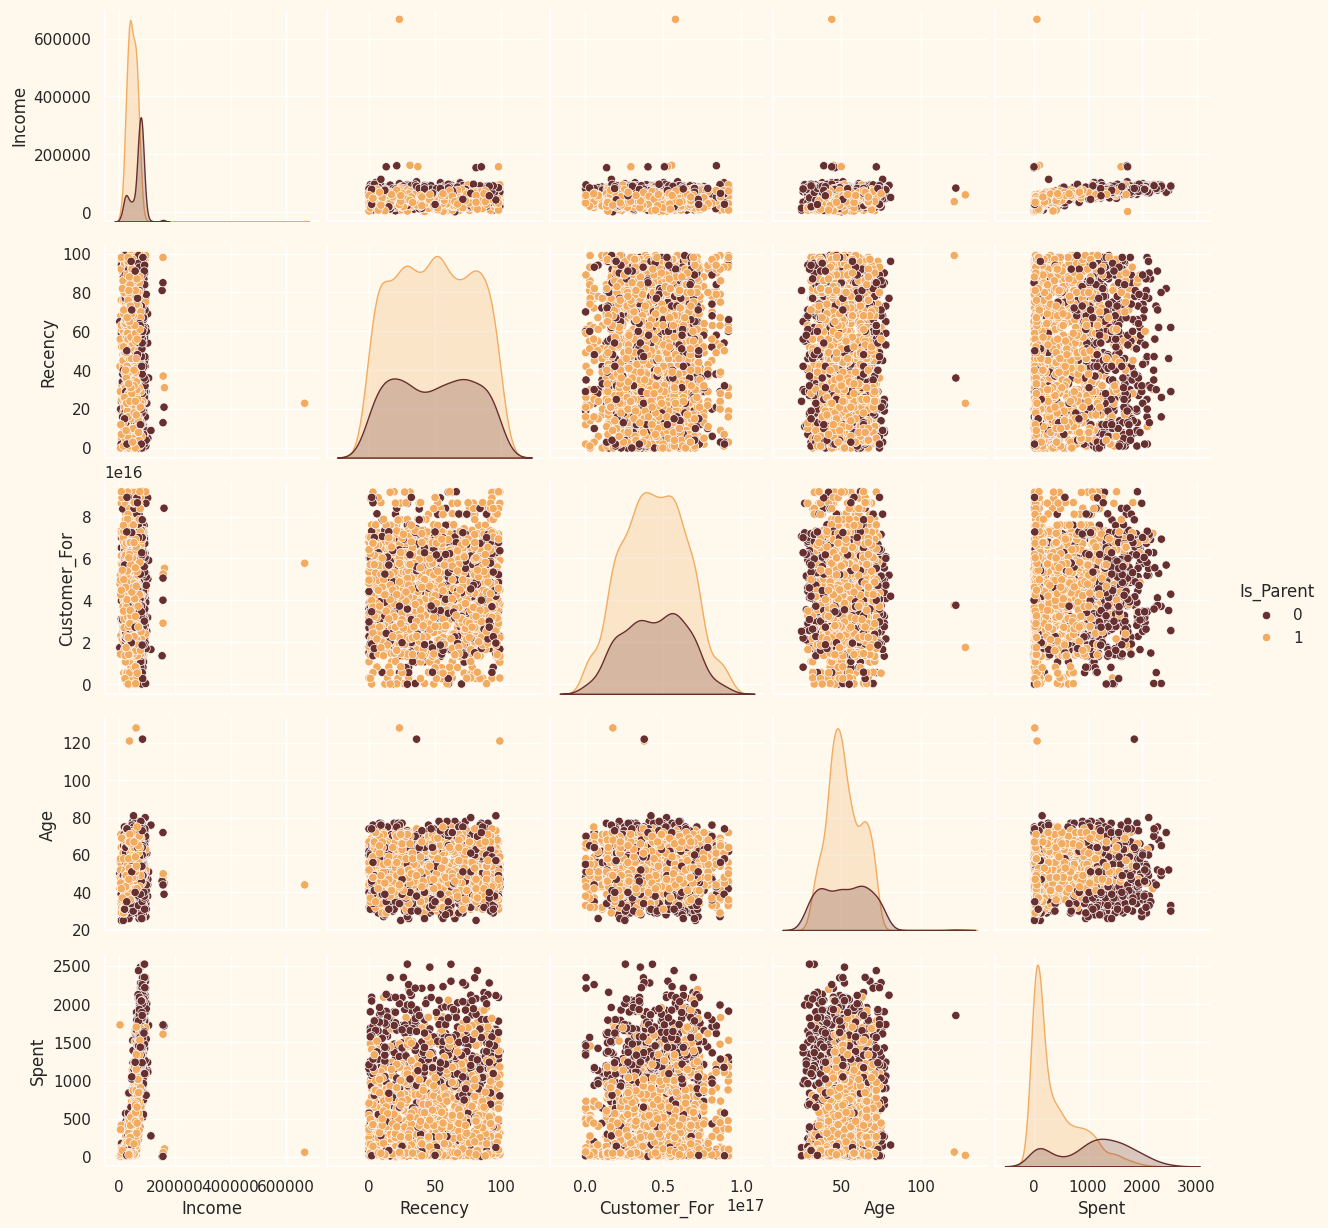

In [16]:
sn.set(rc = {"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

to_plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sn.pairplot(df[to_plot], hue = "Is_Parent", palette = (["#682F2F","#F3AB60"]))
plt.show()

# So I gonna drop them

In [17]:
df = df[(df["Age"] < 90)]
df = df[(df["Income"]<600000)]
print("number of data-points after outliers removal:", len(df))

number of data-points after outliers removal: 2212


# Now I gonna look at correlation between all features, without categorical features

<Axes: >

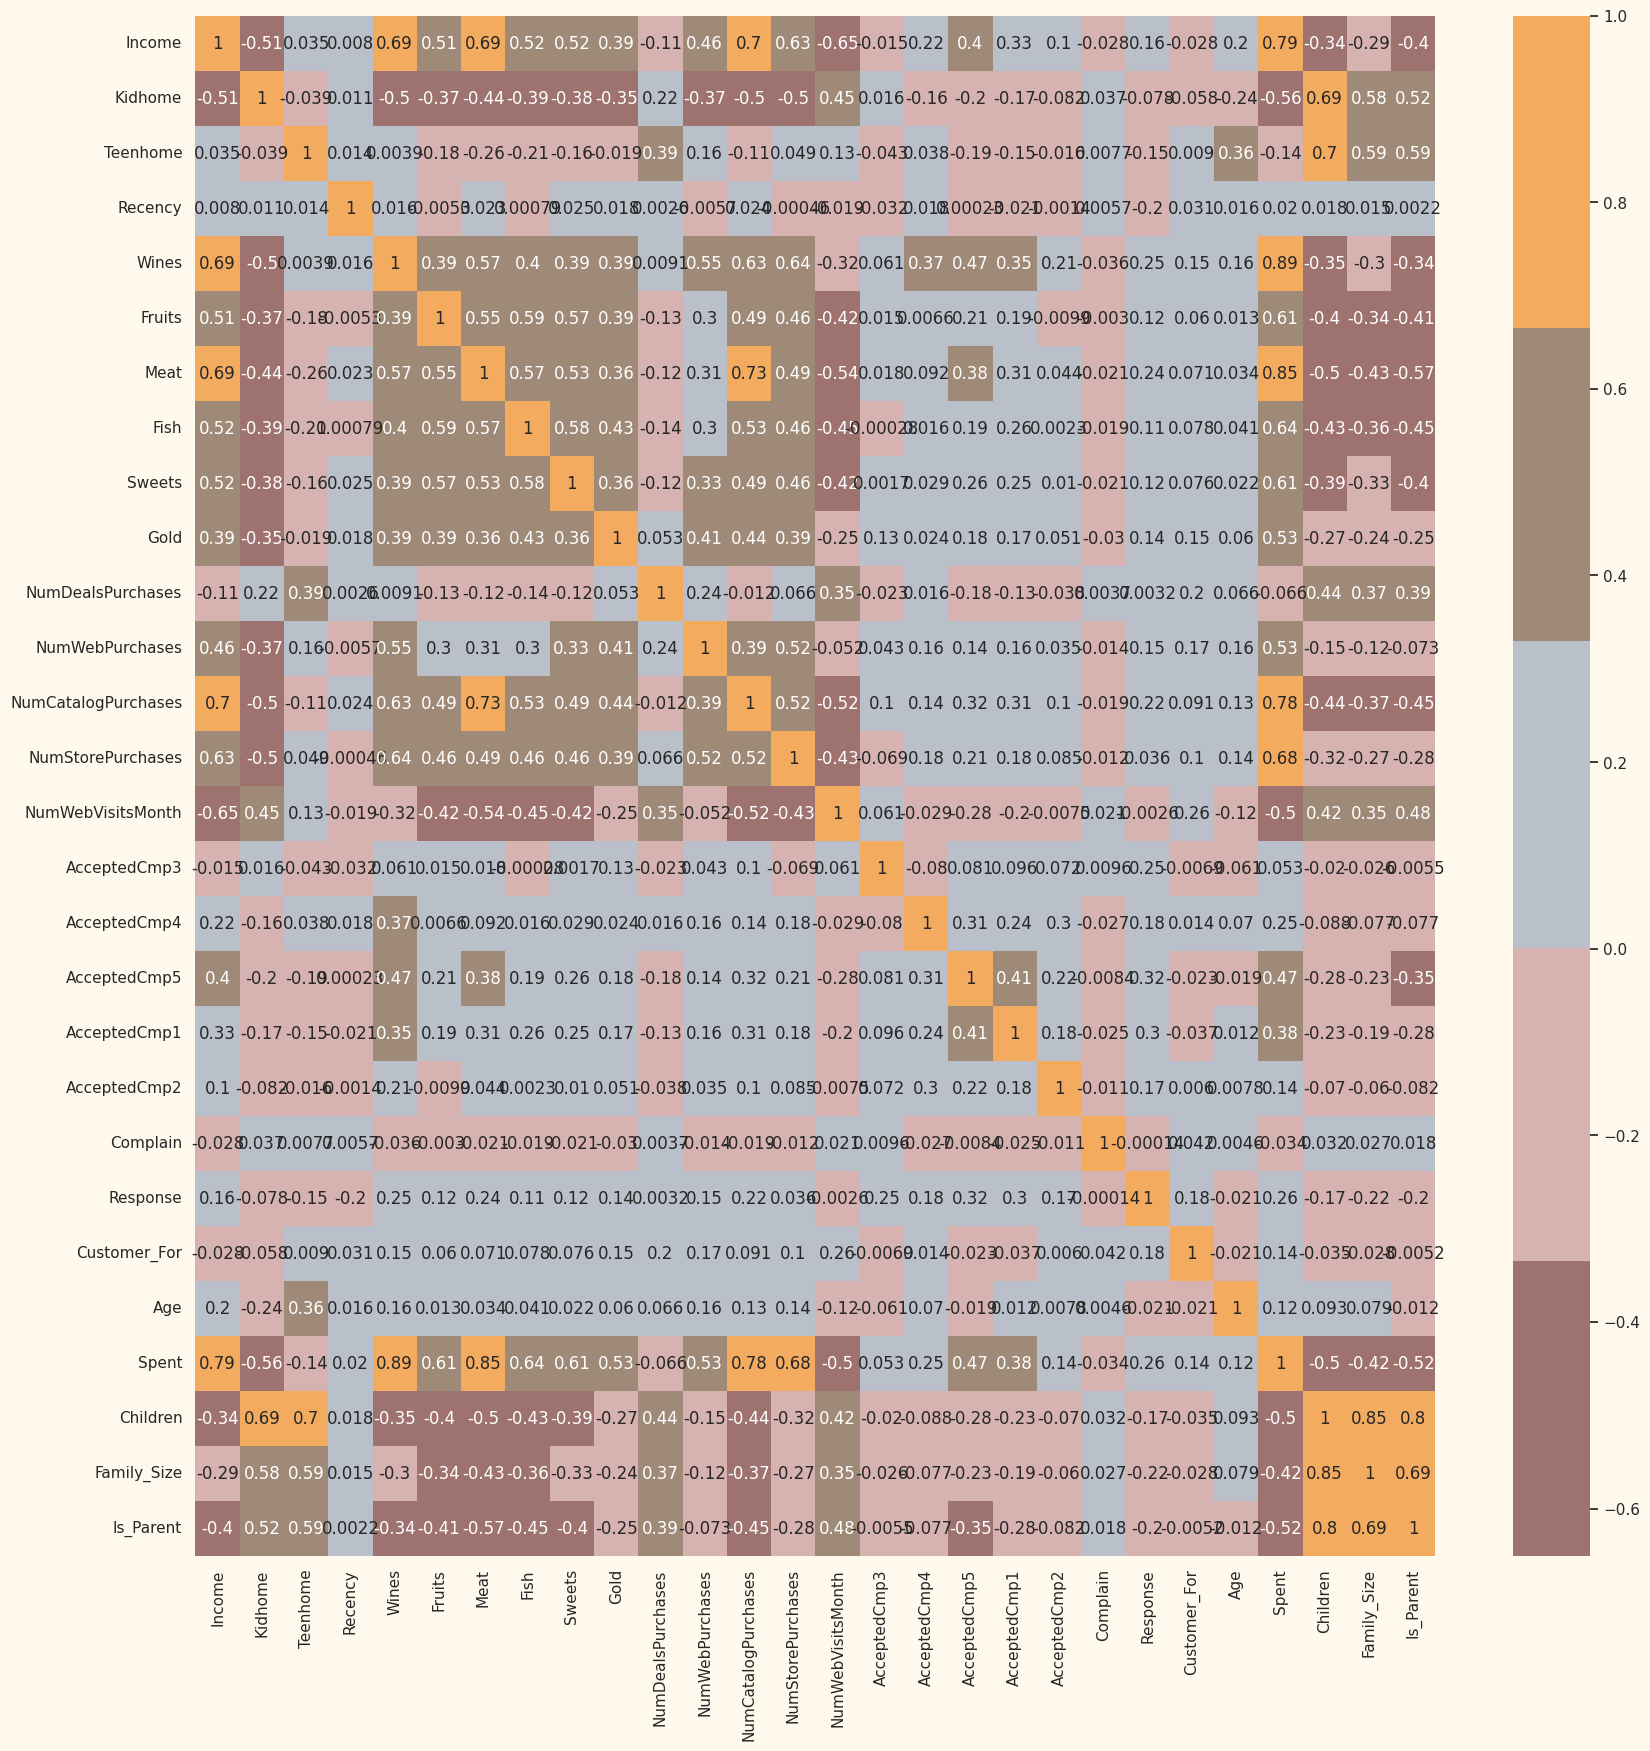

In [18]:
corrmat = df.corr()
plt.figure(figsize = (20, 20))
sn.heatmap(corrmat, annot = True, cmap = cmap, center = 0)

# DATA PREPROCESSING

# Now its time to data preprocessing, for later clustering operations
* First I gonna do Label Encoding (Categorical features)
* To do this I need a list of categorical variables

In [19]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print('Columns that include Categorical variables:', object_cols)

Columns that include Categorical variables: ['Education', 'Living_With']


* Now I can do Label Encoding on object dtypes

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [21]:
le = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(le.fit_transform)

In [22]:
print(df.Education.dtypes, df.Living_With.dtypes)

int64 int64


* Then I gonna make a copy of my data and create a subset of dataframe without features on deals

In [23]:
df1 = df.copy()

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df1 = df1.drop(cols_del, axis = 1)

* Then I can scale rest of the columns

In [24]:
sc = StandardScaler()
sc.fit(df1)
scaled_df1 = pd.DataFrame(sc.transform(df1), columns = df1.columns)

* Now I can use scaled data to reducing the dimensionality

In [25]:
scaled_df1.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


# DIMENSIONALITY REDUCTION

# I gonna use Principal component analysis to reduce the dimensionality of my dataset, it will increasing interpretability and minimize information loss
* Now we have 23 columns. The more features we have the harder it is to work with it.
* Many of my features are correlated, we can use it to reduce them
* I wanna extract 3 most important components, so I gonna reduce the dimensions to 3

In [26]:
from sklearn.decomposition  import PCA

In [27]:
pca = PCA(n_components = 3)
pca.fit(scaled_df1)
PCA_df1 = pd.DataFrame(pca.transform(scaled_df1), columns = (["col1","col2", "col3"]))
PCA_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.569775e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,1.927331e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,2.810691e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


# Now I gonna make 3D Projection of my data with Reduced Dimensions

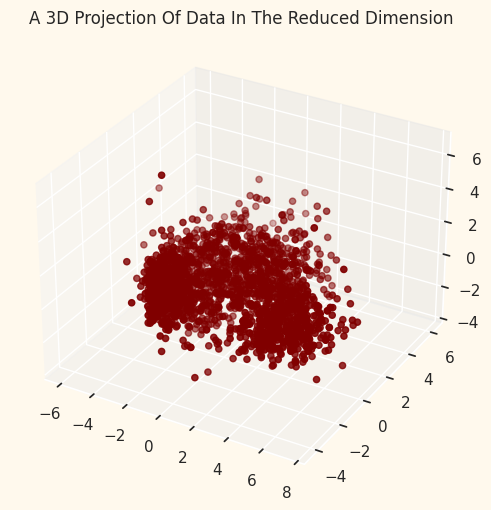

In [34]:
x = PCA_df1["col1"]
y = PCA_df1["col2"]
z = PCA_df1["col3"]

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = 'maroon', marker = 'o')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# CLUSTERING

# I need to achieve desired number of clusters.
* To do this I gonna first use Elbow Method, to determine number of clusters to be formed
* Then when we get optimal number of clusters we will use Agglomerative Clustering model to get this clusters
* And finally examine formed clusters on 3D plot of distribution   

In [35]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# First we are gonna look on graph of elbow method which provide us number of clusters to be formed

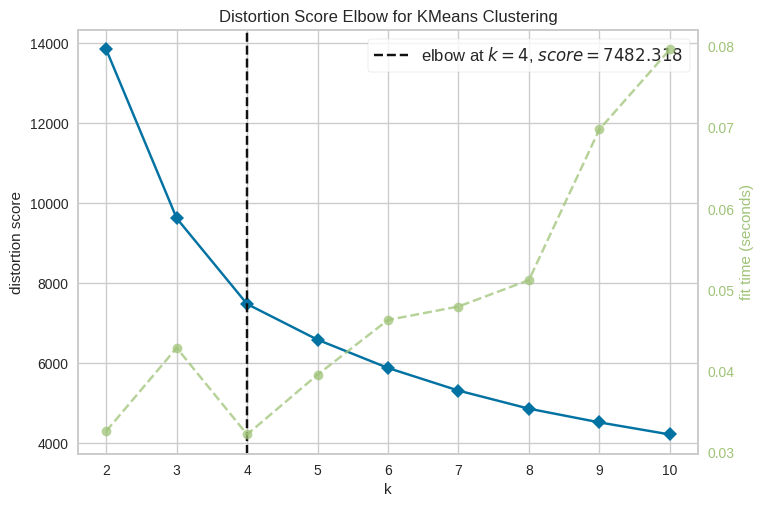

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
Elbow_M = KElbowVisualizer(KMeans(),n_init='auto', k = 10)
Elbow_M.fit(PCA_df1)
Elbow_M.show()


# The conclusion is that 4 clusters is the optimal number. We are gonna use Agglomerative Clustering model to get the clusters

In [44]:
AC = AgglomerativeClustering(n_clusters = 4)

y_pred_AC = AC.fit_predict(PCA_df1)
PCA_df1["clusters"] = y_pred_AC

df["clusters"] = y_pred_AC

# Now we are gonna plot 3D distribution of the clusters

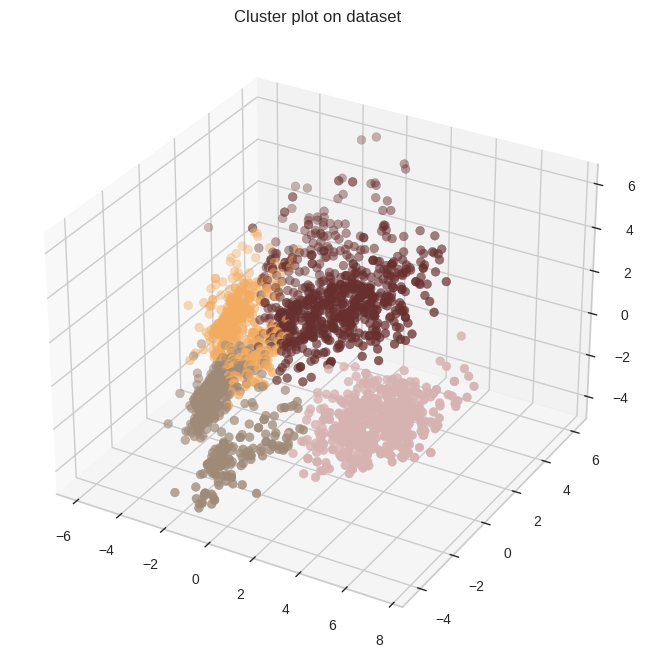

In [45]:
fig = plt.figure(figsize  = (10, 8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, y, s = 40, c = PCA_df1["clusters"], marker = 'o', cmap = cmap)
ax.set_title("Cluster plot on dataset")
plt.show()

# EVALUATING MODELS

# Evaluating section will be dedicated to study the nature and patterns of formed clusters
* We are gonna see in detail data distribution
* Explore each individual cluster based on influence of specific features
* draw conclusions for each cluster  

# First I am gonna look at group distribution of clustering, I don't see any anomalies

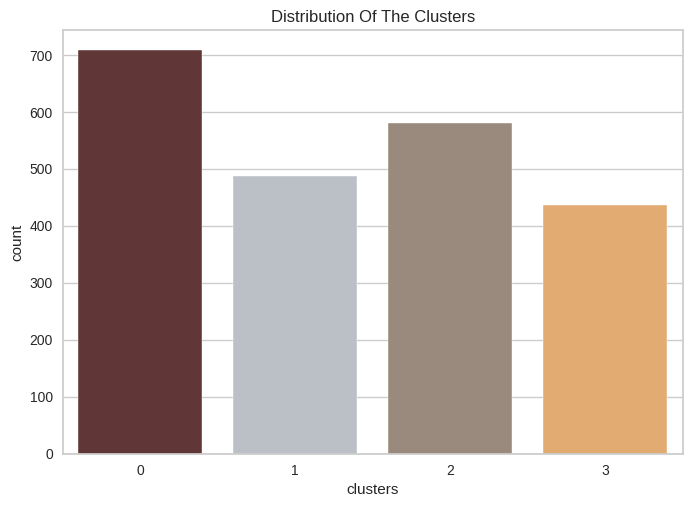

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sn.countplot(x = df["clusters"], palette = pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# Then I gonna plot on graph Clusters profile (spent vs income)

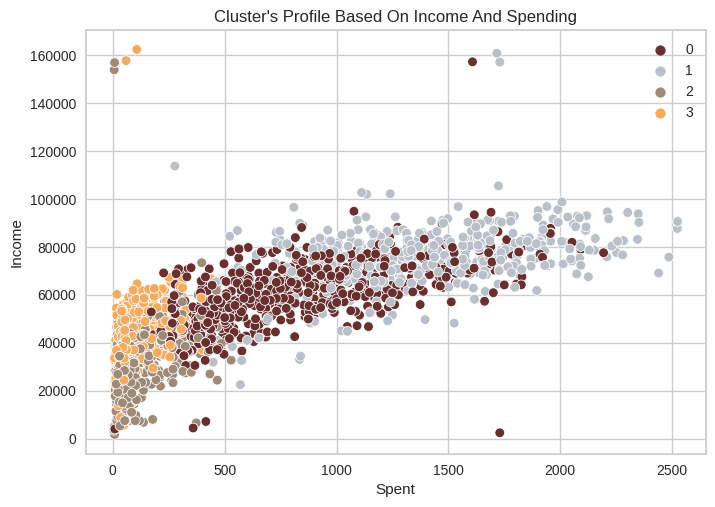

In [ ]:
pl = sn.scatterplot(data = df, x = df["Spent"], y = df["Income"], hue = df["clusters"], palette = pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Interpretation of this graph is following:
* group 0: high spending and average income
* group 1: high spending and high income
* group 2: low spending and low income
* group 3: low spending and low income

# Next I am gonna look at detailed distribution of Spent column per the various products in the data

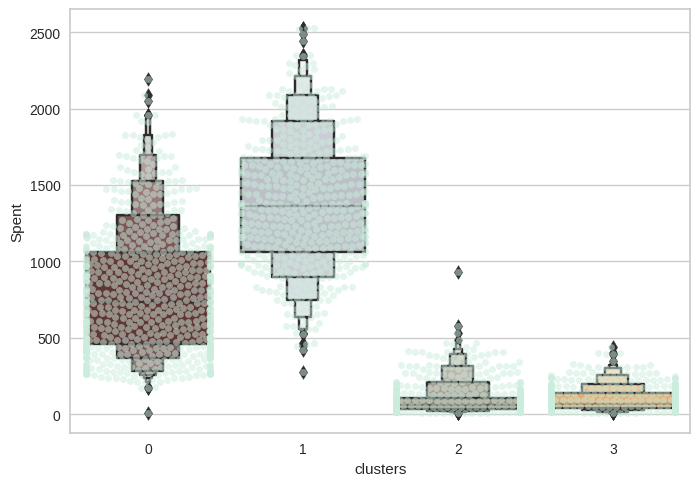

In [ ]:
plt.figure()
pl = sn.swarmplot(x = df["clusters"], y = df["Spent"], color = "#CBEDDD", alpha = 0.5)
pl = sn.boxenplot(x = df["clusters"], y = df["Spent"], palette = pal)
plt.show()

# It is clear that cluster number 1 is our biggest set of customers, then little less, but still big is cluster number 0.

# Then we are gonna explore at spendings for targeted marketing strategies for each cluster

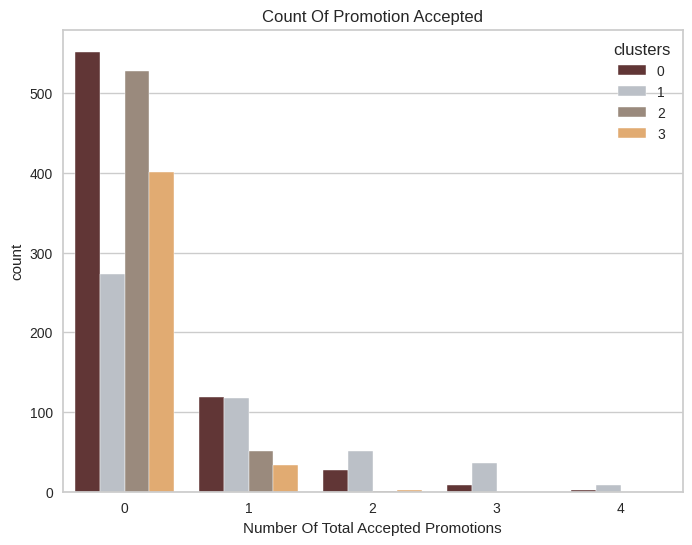

In [ ]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
plt.figure(figsize = (8, 6))

pl = sn.countplot(x = df["Total_Promos"], hue = df["clusters"], palette = pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

# I don't see a big response to the campaigns. What's more, no one take part in all five of them.
* My conclusions are: better targeting and well planned campaigns
* That should boos sales

# I am gonna plot number of deals purchased to see the comparison with promotions, maybe here we are gonna have better results

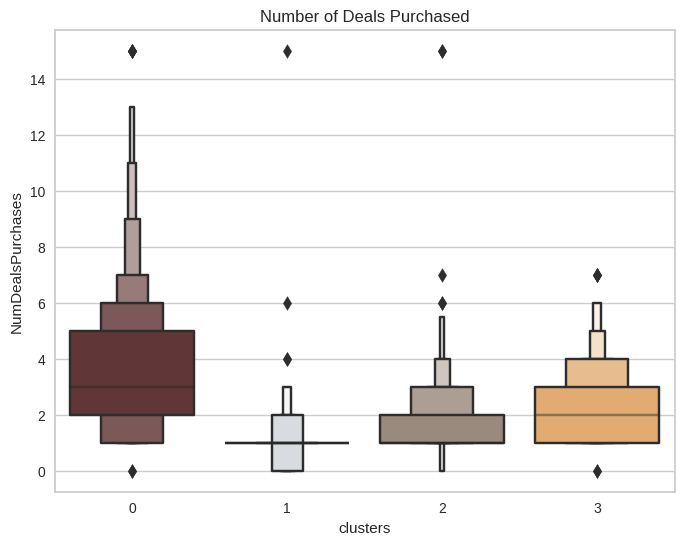

In [ ]:
plt.figure(figsize = (8, 6))
pl = sn.boxenplot(y = df["NumDealsPurchases"], x = df["clusters"], palette = pal)
pl.set_title("Number of Deals Purchased")
plt.show()

# What we can conclude is as follows:
* Yes it actuall did better that promotions
* best outcome is with cluster 0 and 3.
* Our the best customers (cluster number 1) is not much into the deals
* And nothing attract cluster number 2

# PROFILING

# In this last section we are gonna look closer at who is in our clusters and verify who is potencial the best group of customers
* I gonna plot some features that can describe better customer personal traits

<Figure size 800x550 with 0 Axes>

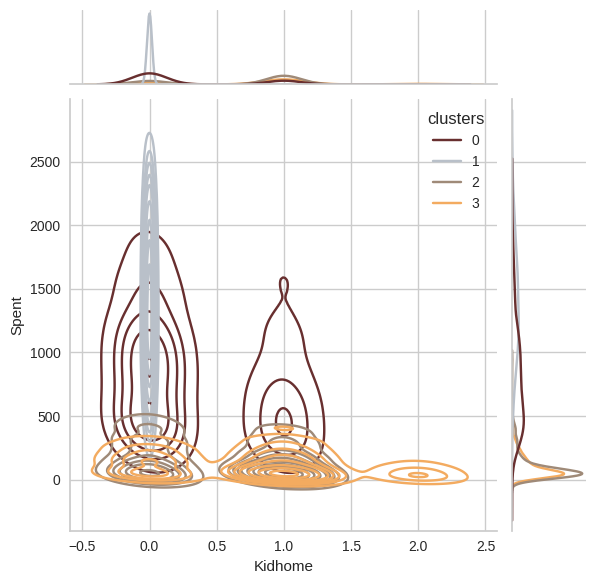

<Figure size 800x550 with 0 Axes>

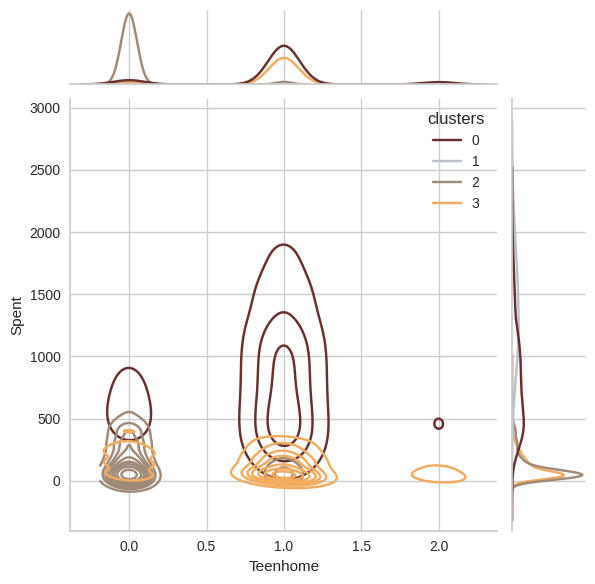

<Figure size 800x550 with 0 Axes>

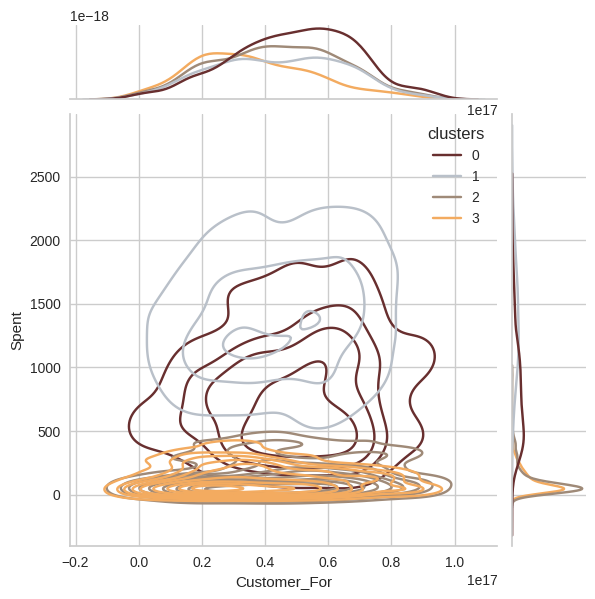

<Figure size 800x550 with 0 Axes>

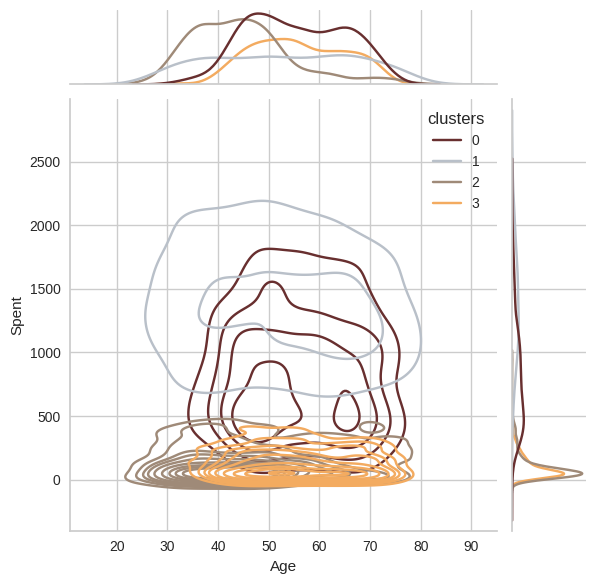

<Figure size 800x550 with 0 Axes>

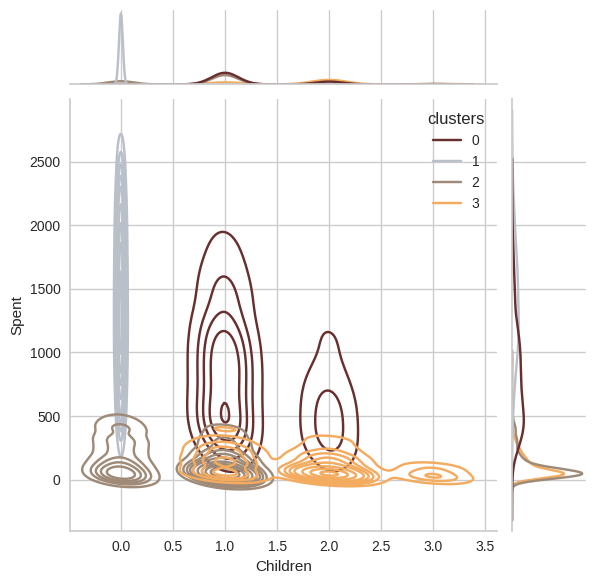

<Figure size 800x550 with 0 Axes>

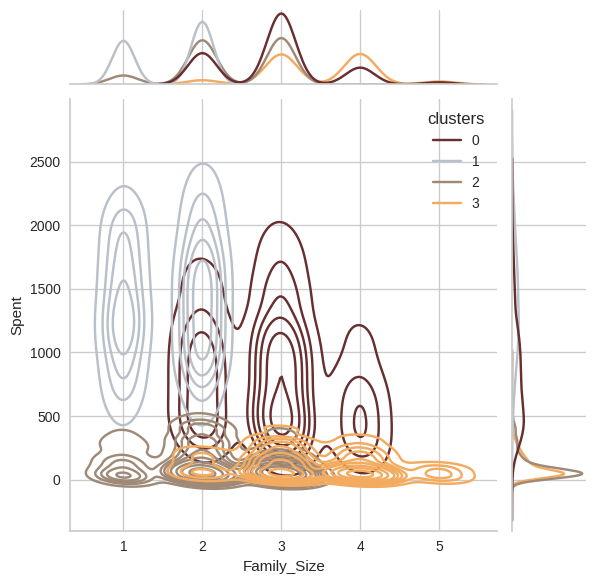

<Figure size 800x550 with 0 Axes>

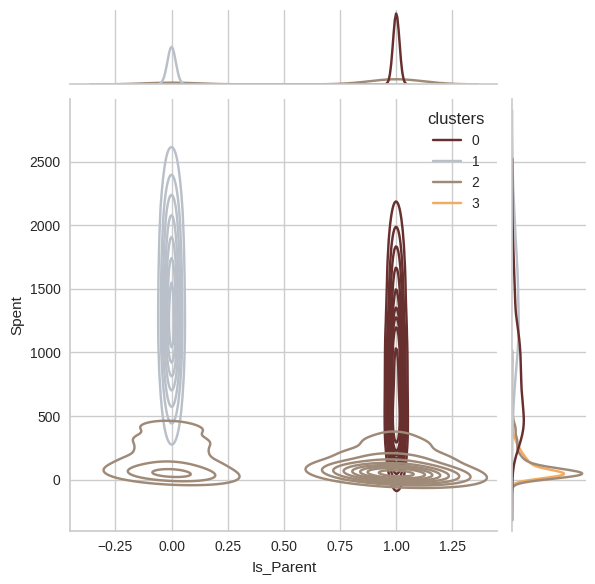

<Figure size 800x550 with 0 Axes>

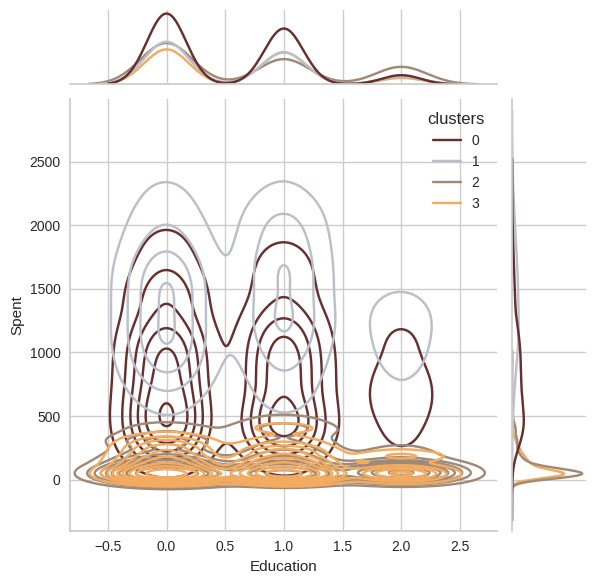

<Figure size 800x550 with 0 Axes>

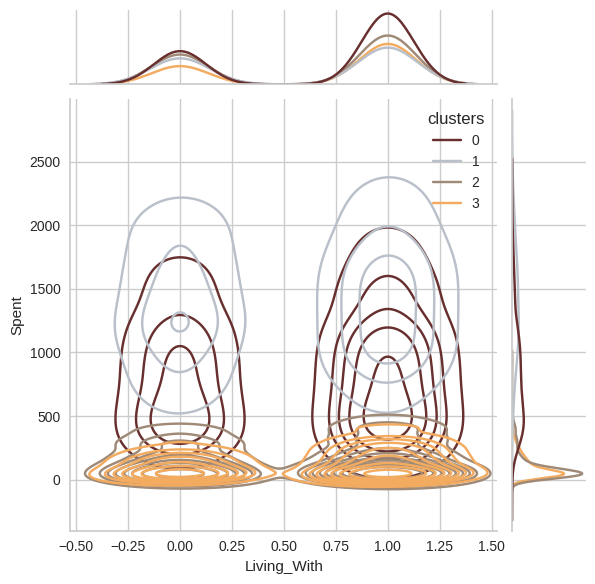

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
  plt.figure()
  sn.jointplot(x = df[i], y = df["Spent"], hue = df["clusters"], kind = "kde", palette = pal)
  plt.show()

# we can get the following conclusions:
# Cluster number 0:
* They are for sure parents, at least 2 family member, max 4
* Have a subset of a group: single partner
* In the most cases they have teeneger at home
* The most part of them is more older than younger

# Cluster number 1:
* They are definitely not a parents, max 2 members in the family
* Just a bit more couples than single persons
* Covers almost all age groups
* It is a high income group

# Cluster number  2:
* In Majority they are parents, max 3 family member
* This group have kids, but not teenegers
* There are younger persons in the most cases


# Cluster number 3:
* They are definitely parents, at the maximum have 5 members in the family and at least 2
* Most of them have teenegers at home
* There are in majority an older group
* They are lower income group

# FINAL CONCLUSIONS

# This was unsupervised clustering project.
* I use marketing campaign data in this project.
* Tehnic that are used in this project was: dimensionality reduction and then agglomerative clustering.
* I got 4 clusters, then i used them to customers profiling according to their family structures and income/spending
# This project could be used for planning better marketing strategies